In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scripts import project_functions 
df = project_functions.load_and_process()
df

,Unnamed: 0,species,id,name,sex,accuracy,birthYear,acquisition,originDate,originLocation,transfers,currently,status,statusDate,COD,entryDate,timespent
0,1,Bottlenose,"NOA0004614, AZA 428, MLF-428",Dazzle,F,actual,1989,Born,1989-04-07,Marineland Florida,NaN,Marineland Florida,Alive,NaN,NaN,1989-04-07,NaN
1,2,Bottlenose,"NOA0004386, AZA 138, IDR-73-1",Tursi,F,actual,1973,Born,1973-11-26,Dolphin Research Center,NaN,Dolphin Research Center,Alive,NaN,NaN,1973-11-26,NaN
2,3,Bottlenose,"NOA0002137, SWC-TTG-7816",Starbuck,M,actual,1978,Born,1978-05-13,SeaWorld San Diego,SeaWorld San Diego to SeaWorld Aurora (??-???-...,SeaWorld Orlando,Alive,NaN,NaN,1978-05-13,NaN
3,4,Bottlenose,"NOA0002690, SWF-TT-7903",Sandy,F,actual,1979,Born,1979-02-03,SeaWorld Orlando,SeaWorld Orlando to SeaWorld San Diego (< Aug ...,SeaWorld San Diego,Alive,NaN,NaN,1979-02-03,NaN
4,5,Bottlenose,"NOA0004418, AZA 242, SWF-TT-7904, MH-82-36-TT ...",Sandy,M,actual,1979,Born,1979-08-15,SeaWorld Orlando,SeaWorld Orlando to New England Aquarium (22-F...,Dolphin Research Center,Alive,NaN,NaN,1979-08-15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,2190,Bottlenose,NOA0004493,NaN,F,estimate,1974,Capture,1978-11-04,Unknown,NaN,Unknown,Died,1978-12-30,hepatic necrosis; pregnant/capture shock,1978-11-04,56.0
2190,2191,Pacific White-Sided,NOA0002531,NaN,F,unknown,NaN,Capture,1980-01-15,Unknown,NaN,Unknown,Died,1992-08-09,Mycotic meningoencephalitis,1980-01-15,4590.0
2191,2192,Bottlenose,NOA0002569,NaN,U,unknown,NaN,Capture,1972-06-01,Unknown,NaN,Unknown,Died,1976-12-15,Pancreatitis,1972-06-01,1658.0
2192,2193,Bottlenose,NOA0002680,NaN,F,unknown,NaN,Capture,1977-05-05,Unknown,NaN,Unknown,Died,1983-02-07,gastritis; enteritis; old age,1977-05-05,2104.0


In [2]:
from pandas_profiling import ProfileReport


In [3]:
df.describe()

,Unnamed: 0,timespent
count,2194.000000,1595.000000
mean,1097.500000,2765.366144
std,633.497566,3347.387324
min,1.000000,-1135.000000
25%,549.250000,119.500000
50%,1097.500000,1535.000000
75%,1645.750000,4042.000000
max,2194.000000,22342.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2194 entries, 0 to 2193
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2194 non-null   int64  
 1   species         2194 non-null   object 
 2   id              2194 non-null   object 
 3   name            1746 non-null   object 
 4   sex             2194 non-null   object 
 5   accuracy        2194 non-null   object 
 6   birthYear       1501 non-null   object 
 7   acquisition     2194 non-null   object 
 8   originDate      2125 non-null   object 
 9   originLocation  2194 non-null   object 
 10  transfers       802 non-null    object 
 11  currently       2194 non-null   object 
 12  status          2194 non-null   object 
 13  statusDate      1660 non-null   object 
 14  COD             1525 non-null   object 
 15  entryDate       2124 non-null   object 
 16  timespent       1595 non-null   float64
dtypes: float64(1), int64(1), object(1

In [5]:
df.shape

(2194, 17)

In [6]:
df.nunique(axis=0)


Unnamed: 0        2194
species             37
id                2161
name              1367
sex                  3
accuracy             3
birthYear           77
acquisition          6
originDate        1459
originLocation     121
transfers          633
currently           97
status               9
statusDate        1416
COD               1002
entryDate         1458
timespent         1135
dtype: int64

In [7]:
df['species'].value_counts()

Bottlenose                  1668
Killer Whale; Orca            79
Beluga                        68
White-sided, Pacific          56
Pacific White-Sided           41
Commerson's                   37
Spinner                       36
Beluga Whale                  28
Short-Finned Pilot Whale      25
Pilot, Short-fin              22
Pseudorca                     18
Common                        17
Rough-Toothed                 15
False Killer Whale            11
Pantropical Spotted            8
Risso's                        6
Long-Finned Pilot Whale        6
Atlantic White- Sided          6
White-Beaked                   6
Harbor Porpoise                5
Melon-Headed Whale             4
Unspecified Or Porpoise        4
Spotted, Atlantic              4
Northern Right Whale           3
Unspecified Pilot Whales       3
Pygmy Killer Whale             3
Amazon River; Boto             2
Backcross                      2
Pilot, Short-finned            2
Common; Saddleback             2
Hybrid    

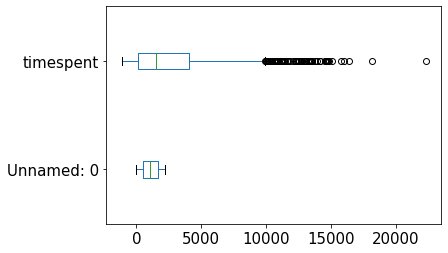

In [8]:
# box plot to determine outliers
boxplot = df.boxplot(grid=False, vert=False,fontsize=15)

In [9]:
df['timespent'].max()

22342.0

In [14]:
# determining outliers
print(df.loc[df['timespent'] == 22342.0])


     Unnamed: 0     species                         id    name sex accuracy  \
657         658  Bottlenose  NOA0004571, AZA 9, MLF-15  Nellie   F   actual   

    birthYear acquisition  originDate      originLocation transfers  \
657      1953        Born  1953-02-27  Marineland Florida       NaN   

              currently status  statusDate         COD   entryDate  timespent  
657  Marineland Florida   Died  2014-04-30  Euthanasia  1953-02-27    22342.0  


In [15]:
#determining outliers
print(df.loc[df['timespent'] >= 15000.0])


     Unnamed: 0           species                                    id  \
547         548        Bottlenose          NOA0004385, AZA 36, IDR-72-3   
657         658        Bottlenose             NOA0004571, AZA 9, MLF-15   
658         659        Bottlenose           NOA0004572, AZA 21, MLF-110   
674         675        Bottlenose  NOA0004581, AZA 96, MLF-329, MPF-101   
676         677        Bottlenose  NOA0004583, AZA 84, MLF-333, MPF-102   
894         895  Pilot, Short-fin               NOA0002921, SWC-GM-8726   

            name sex  accuracy birthYear acquisition  originDate  \
547      Theresa   F  estimate      1960     Capture  1968-01-01   
657       Nellie   F    actual      1953        Born  1953-02-27   
658        Lilly   F  estimate      1962     Capture  1964-02-01   
674  Pebbles Iii   F  estimate      1969     Capture  1971-12-11   
676       Chubby   M  estimate      1969     Capture  1971-12-16   
894      Bubbles   F  estimate      1963     Capture  1966-09-06  

In [11]:
df['timespent'].value_counts()

0.0       87
5.0       16
9.0       14
6.0       13
7.0       10
          ..
5914.0     1
3104.0     1
3033.0     1
4499.0     1
1658.0     1
Name: timespent, Length: 1135, dtype: int64

In [18]:
# determining outliers
print(df.loc[df['timespent'] >= 17000.0])


     Unnamed: 0           species                         id     name sex  \
657         658        Bottlenose  NOA0004571, AZA 9, MLF-15   Nellie   F   
894         895  Pilot, Short-fin    NOA0002921, SWC-GM-8726  Bubbles   F   

     accuracy birthYear acquisition  originDate         originLocation  \
657    actual      1953        Born  1953-02-27     Marineland Florida   
894  estimate      1963     Capture  1966-09-06  Pacific Ocean, CA, US   

                                             transfers           currently  \
657                                                NaN  Marineland Florida   
894  Pacific Ocean, California to Marineland of the...  SeaWorld San Diego   

    status  statusDate                                           COD  \
657   Died  2014-04-30                                    Euthanasia   
894   Died  2016-06-09  chronic myocardial degeneration and fibrosis   

      entryDate  timespent  
657  1953-02-27    22342.0  
894  1966-09-06    18174.0  


In [27]:
# rows with negative timespent values, therefore incorrect dates, to be removed
print(df.loc[df['timespent'] < 0.0])


     Unnamed: 0     species                             id          name sex  \
499         500  Bottlenose  NOA0006275, AZA 947, MML 0407          Indy   M   
537         538  Bottlenose                       AZA ????  Halia's Calf   U   
696         697  Bottlenose            NOA0004610, MLF-423           NaN   F   

     accuracy birthYear acquisition  originDate          originLocation  \
499  estimate      2002      Rescue  2004-05-03  Indian Rocks Beach, FL   
537    actual      2013        Born  2013-10-14    Dolphin Quest Hawaii   
696    actual      1985        Born  1985-04-25      Marineland Florida   

                                             transfers  \
499  Indian Rocks Beach, Florida to Mote Marine Lab...   
537                                                NaN   
696                                                NaN   

                      currently status  statusDate                 COD  \
499  Clearwater Marine Aquarium   Died  2001-03-25                   - 

In [29]:
#removing outliers and incorrect rows
dfc = df[df['timespent'].between(0.0, 17000.00)]

In [28]:
dfc['timespent'].count()

1590

In [31]:
dfc['name'].count()

1176

In [57]:
#dfc.name.unique()

In [36]:
# checking if any of the unnamed ones are duplicates
print(dfc.loc[dfc['name'] == '(No Name)'])

      Unnamed: 0  species          id       name sex accuracy birthYear  \
1746        1747  Spinner  NOA0000243  (No Name)   M  unknown       NaN   
1749        1750  Spinner  NOA0000246  (No Name)   M  unknown       NaN   
1755        1756  Spinner  NOA0000252  (No Name)   F  unknown       NaN   
1768        1769  Spinner  NOA0000265  (No Name)   U  unknown       NaN   
1769        1770  Spinner  NOA0000266  (No Name)   F  unknown       NaN   

     acquisition  originDate originLocation transfers             currently  \
1746     Capture  1972-07-25        Unknown       NaN  Sea Life Park Hawaii   
1749     Capture  1972-10-16        Unknown       NaN  Sea Life Park Hawaii   
1755     Capture  1970-09-24        Unknown       NaN  Sea Life Park Hawaii   
1768     Capture  1974-05-26        Unknown       NaN  Sea Life Park Hawaii   
1769     Capture  1974-05-26        Unknown       NaN  Sea Life Park Hawaii   

        status  statusDate              COD   entryDate  timespent  
1746 

In [38]:
# checking if any of the unnamed ones are duplicates
print(dfc.loc[dfc['name'] == '(Not Named)'])

      Unnamed: 0     species          id         name sex  accuracy birthYear  \
1379        1380  Bottlenose  NOA0000487  (Not Named)   F   unknown       NaN   
1388        1389  Bottlenose  NOA0000497  (Not Named)   F  estimate      1979   

     acquisition  originDate originLocation transfers               currently  \
1379     Capture  1979-05-15        Unknown       NaN  Marine Life Oceanarium   
1388     Capture  1980-05-31        Unknown       NaN  Marine Life Oceanarium   

     status  statusDate            COD   entryDate  timespent  
1379   Died  1979-05-15  CAPTURE SHOCK  1979-05-15        0.0  
1388   Died  1980-05-31  CAPTURE SHOCK  1980-05-31        0.0  


In [55]:
# checking if any of the unnamed ones are duplicates
print(dfc.loc[dfc['name'] == '(None)'])

      Unnamed: 0     species          id    name sex accuracy birthYear  \
1432        1433  Bottlenose  NOA0001428  (None)   F  unknown       NaN   

     acquisition  originDate originLocation transfers  \
1432     Capture  1979-08-20        Unknown       NaN   

                    currently status  statusDate       COD   entryDate  \
1432  Marine World Africa USA   Died  1979-08-20  DROWNING  1979-08-20   

      timespent  
1432        0.0  


In [56]:
# checking if any of the unnamed ones are duplicates
print(dfc.loc[dfc['name'] == '(NO NAME)'])

      Unnamed: 0     species          id       name sex  accuracy birthYear  \
2006        2007  Bottlenose  NOA0004489  (NO NAME)   M  estimate      1968   

     acquisition  originDate originLocation transfers currently status  \
2006     Capture  1976-12-13        Unknown       NaN   Unknown   Died   

      statusDate             COD   entryDate  timespent  
2006  1976-12-13  DURING CAPTURE  1976-12-13        0.0  


In [58]:
dfc


,Unnamed: 0,species,id,name,sex,accuracy,birthYear,acquisition,originDate,originLocation,transfers,currently,status,statusDate,COD,entryDate,timespent
467,468,Commerson's,"NOA0002775, SWC-CC-8330",Betsy,F,estimate,NaN,Capture,1983-11-23,"Straits of Magellan, Chile","Chile, Straits of Magellan to Holding, Chile (...",Aquatica Orlando,Died,2016-01-17,"Geriatric animal, age-related cardiovascular &...",1983-11-23,11743.0
468,469,Commerson's,"NOA0003077, SWC-CC-9327",Fabio,M,actual,1993,Born,1993-09-16,SeaWorld San Diego,SeaWorld San Diego to SeaWorld Aurora (04-May-...,Aquatica Orlando,Died,2014-04-15,"Hepatic necrosis, gastritis",1993-09-16,7516.0
469,470,Commerson's,"NOA0005793, SWC-CC-9827",Keebler,M,actual,1998,Born,1998-10-23,SeaWorld San Diego,SeaWorld San Diego to Aquatica Orlando (27-Jan...,Aquatica Orlando,Died,2014-01-08,Acute hepatic necrosis,1998-10-23,5556.0
470,471,Bottlenose,"NOA0000663, 22196",Vicki,F,estimate,1947,Capture,1960-11-01,"Atlantic Ocean, FL","Florida, Atlantic Ocean to Miami Seaquarium (?...",Brookfield Zoo,Died,1978-04-20,-,1960-11-01,6379.0
471,472,Bottlenose,"NOA0000661, 22198",Salty,M,estimate,1952,Capture,1964-01-01,Florida,"Florida, Unknown to Santini's/Dolphin Research...",Brookfield Zoo,Died,1974-09-23,Hepatic dysfunction,1964-01-01,3918.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,2190,Bottlenose,NOA0004493,NaN,F,estimate,1974,Capture,1978-11-04,Unknown,NaN,Unknown,Died,1978-12-30,hepatic necrosis; pregnant/capture shock,1978-11-04,56.0
2190,2191,Pacific White-Sided,NOA0002531,NaN,F,unknown,NaN,Capture,1980-01-15,Unknown,NaN,Unknown,Died,1992-08-09,Mycotic meningoencephalitis,1980-01-15,4590.0
2191,2192,Bottlenose,NOA0002569,NaN,U,unknown,NaN,Capture,1972-06-01,Unknown,NaN,Unknown,Died,1976-12-15,Pancreatitis,1972-06-01,1658.0
2192,2193,Bottlenose,NOA0002680,NaN,F,unknown,NaN,Capture,1977-05-05,Unknown,NaN,Unknown,Died,1983-02-07,gastritis; enteritis; old age,1977-05-05,2104.0


In [59]:
df['sex'].value_counts()

F    1174
M     915
U     105
Name: sex, dtype: int64

In [61]:
# most are captured
df['acquisition'].value_counts()

Capture        1214
Born            776
Unknown          95
Rescue           89
Stillbirth       15
Miscarriage       5
Name: acquisition, dtype: int64

In [62]:
# the highest number category is from the Gulf of Mexico, locations born in captivity will be excluded
df['originLocation'].value_counts()

Unknown                      977
Gulf of Mexico, MS, US       116
Pacific Ocean, CA, US         86
SeaWorld San Diego            81
SeaWorld Orlando              78
                            ... 
Bolivar Peninsula, TX          1
Churchill Oaks, LA             1
Three Sisters Is., FL, US      1
Sanibel Island, FL, US         1
Gulf Shores, AL, US            1
Name: originLocation, Length: 121, dtype: int64

In [64]:
# Why might the sex be unknown for these individuals, many of 
print(dfc.loc[dfc['sex'] == 'U'])


      Unnamed: 0        species                                  id  \
532          533     Bottlenose         NOA0005710, AZA 1075, 97F-1   
555          556     Bottlenose                NOA0000146, IDR-75-1   
601          602     Bottlenose  NOA0006704, AZA ????, DRC-BC-10-03   
659          660  River, Amazon                 NOA0004567, MLF-162   
682          683     Bottlenose                 NOA0004586, MLF-352   
...          ...            ...                                 ...   
2091        2092     Bottlenose                          NOA0002627   
2092        2093     Bottlenose                          NOA0002628   
2094        2095     Bottlenose                          NOA0002631   
2095        2096     Bottlenose                          NOA0002632   
2191        2192     Bottlenose                          NOA0002569   

               name sex  accuracy birthYear acquisition  originDate  \
532    Shaka's Calf   U    actual      1997        Born  1997-11-03   
555  

In [65]:
# Correlation report
# Notes about the report: many missing values, however many of these are in the transfers and names columns 
# which are kept for individual identification primarily and not analysis. Timespent also has many missing values but this is 
# because the animals are still alive (as of the date of this dataset) and therefore do not have a status date
ProfileReport(dfc).to_notebook_iframe() 

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [66]:
print("Columns are: {0}".format(list(dfc.columns)),"\n")


Columns are: ['Unnamed: 0', 'species', 'id', 'name', 'sex', 'accuracy', 'birthYear', 'acquisition', 'originDate', 'originLocation', 'transfers', 'currently', 'status', 'statusDate', 'COD', 'entryDate', 'timespent'] 



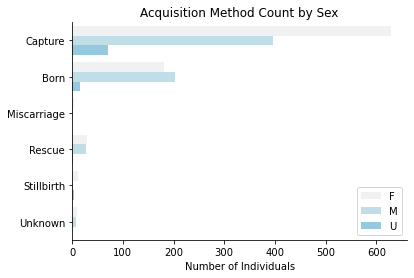

In [71]:
# visualize data
# more females are captured than males, about equal are rescued (M/F)
sns.countplot(data=dfc, 
              y='acquisition', hue = 'sex',color='skyblue')
plt.ylabel('')
plt.title('Acquisition Method Count by Sex')
plt.xlabel('Number of Individuals')
plt.legend(loc=4)
sns.despine()

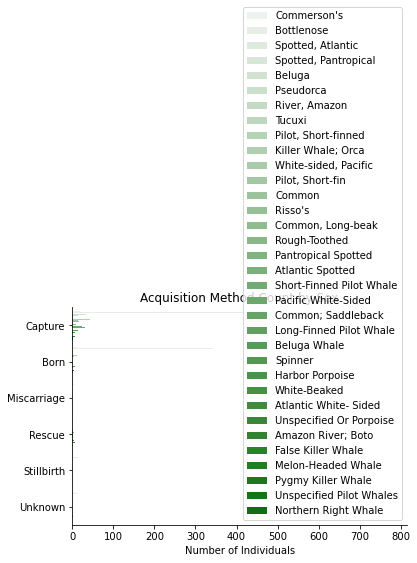

In [73]:
# visualize data
# not a helpful plot
sns.countplot(data=dfc, 
              y='acquisition', hue = 'species',color='green')
plt.ylabel('')
plt.title('Acquisition Method Count by Sex')
plt.xlabel('Number of Individuals')
plt.legend(loc=0)
sns.despine()